In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [159]:
#Pregnancy dataset of women, the objective is to predict whether a mum is a smoker or not.
#I will see this as a classification problem either a smoker or not a smoker.
df = pd.read_csv("babies.csv")
#Drop unnecessary column
df = df.drop("case", axis=1)

df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


<Axes: >

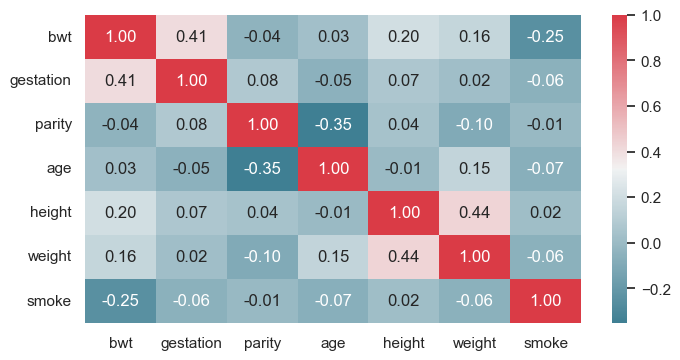

In [505]:
#Here we see that smoke only correlates heavly with bwt compared to the rest, height and weight also correlates same with
#gestation and bwt. But overall this seems to have pretty independent features and the odds of it being linearly
#seperable is lower.
correlation = df.corr()

plt.figure(figsize=(8, 4))

sns.heatmap(correlation, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=drop_self)


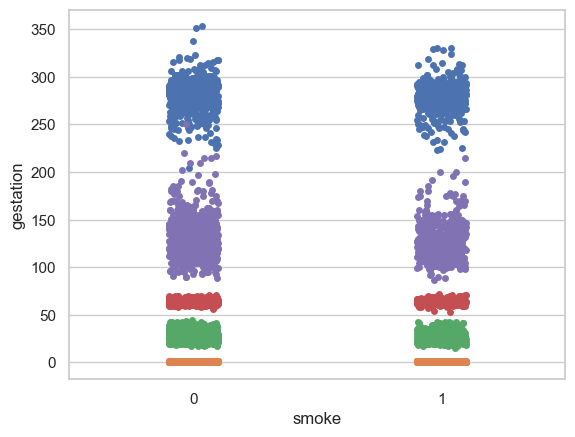

In [161]:
#To check if this dataset is linearly seperable we will make one graph with each feature in different colors.
#Since we have "smoke" on the x axis, to check if this data is linearly seperable we should be able to draw a horizontal
#line for each feature and if smoker and not smoker is moslty on the other side of each other on the line, that feature is linear seperable.
#Since we can not draw that line for any of the features we can conclude that the dataset is not linearly seperable.
#We have a 50% to guess right if someone is a smoker or not, with this data we could in theory calculate a better odds.
#However doing so is hard and takes long time, so we are going to use machine-learning instead.
sns.set(style="whitegrid")

test = sns.stripplot(x='smoke', y='gestation', data=df)
test = sns.stripplot(x='smoke', y='parity', data=df)
test = sns.stripplot(x='smoke', y='age', data=df)
test = sns.stripplot(x='smoke', y='height', data=df)
test = sns.stripplot(x='smoke', y='weight', data=df)


In [162]:
x = df.drop(["smoke"], axis=1)
y = df["smoke"]

In [513]:
#Since this is a classification problem, it is recommended to try a linearSVC model.
#Since this dataset does not seem to be linear it would probably give a bad result using a linear model.
#So instead we are going to use NuSVC that is a non-linear SVM and have in theory a greater chance to perform well.
from sklearn.metrics import accuracy_score
from sklearn import svm
supportVectorClassification = svm.NuSVC(gamma="auto")





In [535]:
#Here we are going to train the algorithm 100 times individually with different parts of the dataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
allScores = []
for i in range(100):
    #Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    #Train the model
    supportVectorClassification.fit(x_train, y_train)
    #Get the prediction and add to the list
    y_predSVC = supportVectorClassification.predict(x_test)
    allScores.append(accuracy_score(y_predSVC, y_test))

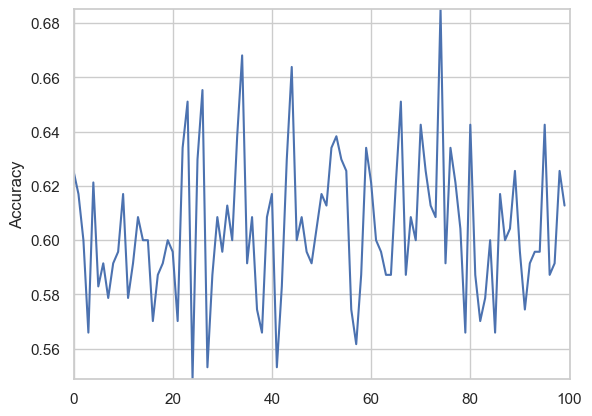

Lines: 1174


In [575]:
#On this graph we can see a problem, the accuracy of this model difference alot based on the dataset.
#The difference is so large between runs becuase we have a small dataset, only 1174 lines.
#We are going to try to minimize this difference with cross-validation since it trains the algorithm on the whole dataset.
plt.plot(range(len(allScores)), allScores)
plt.ylabel('Accuracy')
plt.axis([0, len(allScores), min(allScores), max(allScores)])
plt.show()
print("Lines:",len(df.index))

In [568]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
allScoresCrossValidation = []
for i in range(100):
    #Splits up the dataset
    kf = KFold(n_splits = 5, shuffle=True)
    #Runs the cross validation and adds the mean to the list
    scores = cross_val_score(supportVectorClassification, x, y, cv=kf)
    allScoresCrossValidation.append(scores.mean())


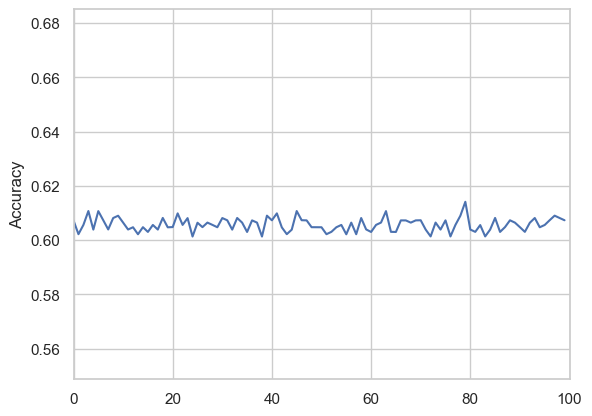

In [574]:
#With this graph we can see that the result stabilised alot and is between the results before crossvalidation.
#Even though the previous trained model could have better accuracy it probably won't be as good as the cross-validated one
#when it comes to new data.
#That is because the cross-validated one has trained on all the data in different runs so it is like it has trained
#on more data and can give a better guess.
#Though this prediction is not the highest, it is better than guessing.
#The first reason for this can be that another algorithm is better, like kneighborsclassifier or randomforestclassifier.
#Othe reason for this can be that we have to little data or the features doesn't really have anything to do with each other
#Correlation doesn't equal causation.
plt.plot(range(len(allScoresCrossValidation)), allScoresCrossValidation)
plt.ylabel('Accuracy')
plt.axis([0, len(allScoresCrossValidation), min(allScores), max(allScores)])
plt.show()

In [576]:
from joblib import dump
dump(supportVectorClassification, 'SupportVector.joblib') 

['SupportVector.joblib']